## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [8]:
from keras.regularizers import l1, l2, l1_l2

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l2_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l2(l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l2(l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [9]:
"""Code Here
設定超參數
"""

## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [11]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in L2_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l2_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Regulizer = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [====

50000/50000 [==============================] - 18s 366us/step - loss: 1.6179 - accuracy: 0.5213 - val_loss: 1.6978 - val_accuracy: 0.4853
Epoch 49/50
50000/50000 [==============================] - 19s 384us/step - loss: 1.6177 - accuracy: 0.5196 - val_loss: 1.6666 - val_accuracy: 0.5033
Epoch 50/50
50000/50000 [==============================] - 15s 309us/step - loss: 1.6126 - accuracy: 0.5240 - val_loss: 1.6725 - val_accuracy: 0.4964
Experiment with Regulizer = 0.000100
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
______________________________________________

50000/50000 [==============================] - 19s 373us/step - loss: 1.0841 - accuracy: 0.6692 - val_loss: 1.4992 - val_accuracy: 0.5366
Epoch 46/50
50000/50000 [==============================] - 22s 435us/step - loss: 1.0710 - accuracy: 0.6746 - val_loss: 1.5902 - val_accuracy: 0.5113
Epoch 47/50
50000/50000 [==============================] - 24s 475us/step - loss: 1.0613 - accuracy: 0.6764 - val_loss: 1.5633 - val_accuracy: 0.5200
Epoch 48/50
50000/50000 [==============================] - 19s 371us/step - loss: 1.0471 - accuracy: 0.6833 - val_loss: 1.5168 - val_accuracy: 0.5295
Epoch 49/50
50000/50000 [==============================] - 16s 328us/step - loss: 1.0390 - accuracy: 0.6847 - val_loss: 1.4989 - val_accuracy: 0.5359
Epoch 50/50
50000/50000 [==============================] - 18s 368us/step - loss: 1.0229 - accuracy: 0.6922 - val_loss: 1.5658 - val_accuracy: 0.5212
Experiment with Regulizer = 0.000000
Model: "model_1"
__________________________________________________________

50000/50000 [==============================] - 33s 659us/step - loss: 0.9824 - accuracy: 0.6550 - val_loss: 1.3532 - val_accuracy: 0.5339
Epoch 43/50
50000/50000 [==============================] - 30s 607us/step - loss: 0.9612 - accuracy: 0.6642 - val_loss: 1.4617 - val_accuracy: 0.5151
Epoch 44/50
50000/50000 [==============================] - 32s 640us/step - loss: 0.9519 - accuracy: 0.6675 - val_loss: 1.3511 - val_accuracy: 0.5398
Epoch 45/50
50000/50000 [==============================] - 32s 636us/step - loss: 0.9437 - accuracy: 0.6683 - val_loss: 1.4085 - val_accuracy: 0.5239
Epoch 46/50
50000/50000 [==============================] - 31s 619us/step - loss: 0.9323 - accuracy: 0.6723 - val_loss: 1.4033 - val_accuracy: 0.5279
Epoch 47/50
50000/50000 [==============================] - 32s 641us/step - loss: 0.9198 - accuracy: 0.6763 - val_loss: 1.3945 - val_accuracy: 0.5231
Epoch 48/50
50000/50000 [==============================] - 32s 639us/step - loss: 0.9066 - accuracy: 0.6826 - va

50000/50000 [==============================] - 19s 376us/step - loss: 1.0116 - accuracy: 0.6417 - val_loss: 1.4176 - val_accuracy: 0.5123
Epoch 40/50
50000/50000 [==============================] - 20s 391us/step - loss: 1.0000 - accuracy: 0.6473 - val_loss: 1.3536 - val_accuracy: 0.5275
Epoch 41/50
50000/50000 [==============================] - 20s 391us/step - loss: 0.9875 - accuracy: 0.6519 - val_loss: 1.3531 - val_accuracy: 0.5355
Epoch 42/50
50000/50000 [==============================] - 19s 374us/step - loss: 0.9768 - accuracy: 0.6562 - val_loss: 1.3405 - val_accuracy: 0.5363
Epoch 43/50
50000/50000 [==============================] - 19s 387us/step - loss: 0.9660 - accuracy: 0.6589 - val_loss: 1.3706 - val_accuracy: 0.5225
Epoch 44/50
50000/50000 [==============================] - 20s 390us/step - loss: 0.9517 - accuracy: 0.6634 - val_loss: 1.3661 - val_accuracy: 0.5309
Epoch 45/50
50000/50000 [==============================] - 19s 388us/step - loss: 0.9447 - accuracy: 0.6675 - va

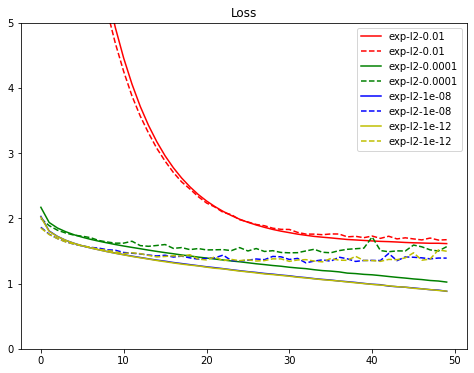

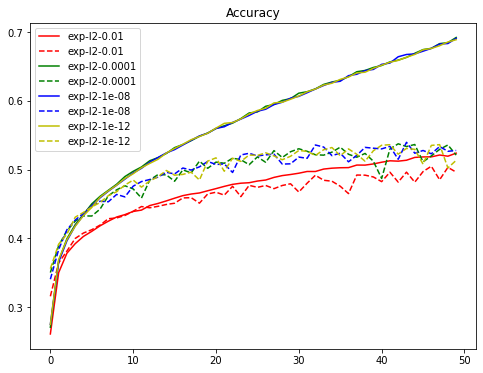

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()
